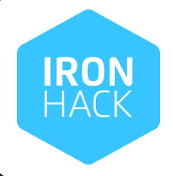

<h1 style="color: #00BFFF;">Exploratory Data Analysis Test</h1>

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. 
* It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. 
* Further on, I highly recommend using data visualization in this step.

<h1 style="color: #00BFFF;">00 |</h1>

<div class="alert alert-block alert-info">
Tip # 1
Best practices; write all your libraries & functions at the beginning !
</div>

In [1]:
# üìö Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ‚öôÔ∏è Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [3]:
data = pd.read_csv('fifa_23.csv')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [4]:
data.sample(5)

Known As               Full Name  Overall  Potential  \
7515           B. Mugabi            Bevis Mugabi       67         69   
12865  Y. Borges Sanches  Yvandro Borges Sanches       63         81   
8112         M. Hanousek          Matƒõj Hanousek       67         67   
15263           C. Tapia         Christian Tapia       60         69   
8329        J. Marulanda      Jonathan Marulanda       67         68   

       Value(in Euro) Positions Played Best Position     Nationality  \
7515          1100000            CB,RB            CB          Uganda   
12865         1200000            LM,ST            RM      Luxembourg   
8112           900000               LB            LB  Czech Republic   
15263          475000               GK            GK         Ecuador   
8329          1100000               RB            RB        Colombia   

                                             Image Link  Age  Height(in cm)  \
7515   https://cdn.sofifa.net/players/209/285/23_60.png   27            187   
12865  https://cdn.sofifa.net/players/269/952/23_60.png   18            175   
8112   https://cdn.sofifa.net/players/247/203/23_60.png   29            182   
15263  https://cdn.sofifa.net/players/268/593/23_60.png   20            184   
8329   https://cdn.sofifa.net/players/242/155/23_60.png   26            179   

       Weight(in kg)  TotalStats  BaseStats                 Club Name  \
7515              83        1588        351                Motherwell   
12865             67        1731        367  Borussia M√∂nchengladbach   
8112              74        1762        383  Gazi≈üehir Gaziantep F.K.   
15263             78         985        336               Mushuc Runa   
8329              71        1579        348      Club Deportes Tolima   

       Wage(in Euro)  Release Clause Club Position Contract Until  \
7515            3000         2000000            CB           2024   
12865           2000         2800000           SUB           2027   
8112             500               0            LB           2023   
15263            500         1100000           SUB           2023   
8329            1000         1600000            RB           2022   

      Club Jersey Number  Joined On On Loan Preferred Foot  Weak Foot Rating  \
7515                   5       2019       -          Right                 3   
12865                 38       2022       -          Right                 2   
8112                  16       2019    TRUE           Left                 2   
15263                  1       2022       -          Right                 2   
8329                   4       2022       -          Right                 2   

       Skill Moves  International Reputation National Team Name  \
7515             2                         1                  -   
12865            3                         1                  -   
8112             2                         1                  -   
15263            1                         1                  -   
8329             2                         1                  -   

                  National Team Image Link National Team Position  \
7515                                     -                      -   
12865                                    -                      -   
8112   https://cdn.sofifa.net/flags/cz.png                      -   
15263  https://cdn.sofifa.net/flags/ec.png                      -   
8329   https://cdn.sofifa.net/flags/co.png                      -   

      National Team Jersey Number Attacking Work Rate Defensive Work Rate  \
7515                            -              Medium                High   
12865                           -              Medium                High   
8112                            -                High                High   
15263                           -              Medium              Medium   
8329                            -              Medium              Medium   

       Pace Total  Shooting Total  Passing Total  Dribbl

In [5]:
data.shape

(18539, 89)

**First impression:**
    
_____________

The following dataset is a collection of **one-year** 18.539 player information distributed among 89 different columns. The majority of our data types are mostly **numericals** (71 integers / 18 objects).

Our **project goal** is to identify players who have the potential to become **the next "Mbapp√©"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall Score`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h2 style="color: #008080;">Column standardization</h2>

In [6]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]

In [7]:
data.head(3)

known_as           full_name  overall  potential  value(in_euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   

  positions_played best_position nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   

                                         image_link  age  height(in_cm)  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35            169   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34            185   
2  https://cdn.sofifa.net/players/188/545/23_60.png   33            185   

   weight(in_kg)  totalstats  basestats            club_name  wage(in_euro)  \
0             67        2190        452  Paris Saint-Germain         195000   
1             81        2147        455       Real Madrid CF         450000   
2             81        2205        458         FC Barcelona         420000   

   release_clause club_position contract_until club_jersey_number  joined_on  \
0        99900000            RW           2023                 30       2021   
1       131199999            CF           2023                  9       2009   
2       172200000            ST           2025                  9       2022   

  on_loan preferred_foot  weak_foot_rating  skill_moves  \
0       -           Left                 4            4   
1       -          Right                 4            4   
2       -          Right                 4            4   

   international_reputation national_team_name  \
0                         5          Argentina   
1                         4             France   
2                         5             Poland   

              national_team_image_link national_team_position  \
0  https://cdn.sofifa.net/flags/ar.png                     RW   
1  https://cdn.sofifa.net/flags/fr.png                     ST   
2  https://cdn.sofifa.net/flags/pl.png                     ST   

  national_team_jersey_number attacking_work_rate defensive_work_rate  \
0                          10                 Low                 Low   
1                          19              Medium              Medium   
2                           9                High              Medium   

   pace_total  shooting_total  passing_total  dribbling_total  \
0          81              89             90               94   
1          80              88             83               87   
2          75              91             79               86   

   defending_total  physicality_total  crossing  finishing  heading_accuracy  \
0               34                 64        84         90                70   
1               39                 78        75         92                90   
2               44                 83        71         94                91   

   short_passing  volleys  dribbling  curve  freekick_accuracy  longpassing  \
0             91       88         95     93                 93           90   
1             89       88         87     82                 73           76   
2             84       89         85     79                 85           70   

   ballcontrol  acceleration  sprint_speed  agility  reactions  balance  \
0           93            87            76       91         92       95   
1           91            79            80       78         92       72   
2           89            76            75       77         93       82   

   shot_power  jumping  stamina  strength  long_shots  aggression  \
0          86       68       70        68          91          44   
1          87       79       82        82          80          63   
2          91       85       76        87          84          81   

   interceptions  positioning  vision  penalties  composure  marking  \
0             40           

<h2 style="color: #008080;">Copy as best practices</h2>

In [8]:
df = data.copy()

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [9]:
data.head(0)

Empty DataFrame
Columns: [known_as, full_name, overall, potential, value(in_euro), positions_played, best_position, nationality, image_link, age, height(in_cm), weight(in_kg), totalstats, basestats, club_name, wage(in_euro), release_clause, club_position, contract_until, club_jersey_number, joined_on, on_loan, preferred_foot, weak_foot_rating, skill_moves, international_reputation, national_team_name, national_team_image_link, national_team_position, national_team_jersey_number, attacking_work_rate, defensive_work_rate, pace_total, shooting_total, passing_total, dribbling_total, defending_total, physicality_total, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, freekick_accuracy, longpassing, ballcontrol, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, composure, marking, standing_tackle, sliding_tackle, goalkeeper_diving, goalkeeper_handling, _goalkeeperkicking, goalkeeper_positioning, goalkeeper_reflexes, st_rating, lw_rating, lf_rating, cf_rating, rf_rating, rw_rating, cam_rating, lm_rating, cm_rating, rm_rating, lwb_rating, cdm_rating, rwb_rating, lb_rating, cb_rating, rb_rating, gk_rating]
Index: []

<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [10]:
data.shape

(18539, 89)

_____________
From all features above, we will drop the following:
* `know_as`, `full_name`, `image_link`, `national_team_image` it's just the player identifier.
* `club_name`, `club_position`, `contract_until`, `club_jersey_number`, `joined_on`, `on_loan` these are specific to the player's current club situation and do not directly influence their potential or performance metrics.
* `national_team_name`, `national_team_position`, `national_team_jersey_number` are unnecessary details.
* `st_rating`, `lw_raating`, `cf_rating` are giving us to much detail of the player information, not needed if we are focusing on **overall score** and best position.
* Also, since we are looking for **field players** we can drop some goalkeeper-specific features like `goalkeeper_diving`, `goalkeeper_handling`, `_goalkeeperkicking`, `goalkeeper_positioning` and `goalkeeper_reflexes`
* Aggregated stats like `totalstats` and `basestats` are the sum of different stats. Same with `crossing`, `finishing`, etc., are the sum of `attacking`
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
_____________

In [11]:
df = df.drop(columns=['known_as', 'full_name', 'image_link', 'national_team_image_link',
                      'club_name', 'club_position', 'contract_until', 'club_jersey_number',
                      'joined_on', 'on_loan', 'national_team_name', 'national_team_position',
                      'national_team_jersey_number', 'st_rating', 'lw_rating', 'cf_rating',
                      'rf_rating', 'rw_rating', 'cam_rating', 'lm_rating', 'cm_rating',
                      'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating',
                      'cb_rating', 'rb_rating', 'gk_rating',
                      'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
                      'goalkeeper_positioning', 'goalkeeper_reflexes', 'totalstats',
                      'basestats', 'crossing', 'finishing', 'volleys', 'dribbling', 
                      'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 
                      'acceleration', 'sprint_speed', 'agility', 'reactions', 
                      'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                      'long_shots', 'aggression', 'interceptions', 'positioning', 
                      'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
                      'sliding_tackle', 'positions_played'])

In [12]:
df.shape

(18539, 25)

<h2 style="color: #008080;">Checking Null Values</h2>

In [13]:
df.isnull().sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [14]:
df.duplicated().sum()

119

In [15]:
df.drop_duplicates(inplace=True)

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [16]:
df.eq(" ").sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Moving our target to the right</h2>

In [24]:
df.columns

Index(['potential', 'value(in_euro)', 'best_position', 'nationality', 'age',
       'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)', 'release_clause',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating', 'overall'],
      dtype='object')

In [23]:
df.head(3)

potential  value(in_euro) best_position nationality  age  height(in_cm)  \
0         91        54000000           CAM   Argentina   35            169   
1         91        64000000            CF      France   34            185   
2         91        84000000            ST      Poland   33            185   

   weight(in_kg)  wage(in_euro)  release_clause preferred_foot  \
0             67         195000        99900000           Left   
1             81         450000       131199999          Right   
2             81         420000       172200000          Right   

   weak_foot_rating  skill_moves  international_reputation  \
0                 4            4                         5   
1                 4            4                         4   
2                 4            4                         5   

  attacking_work_rate defensive_work_rate  pace_total  shooting_total  \
0                 Low                 Low          81              89   
1              Medium              Medium          80              88   
2                High              Medium          75              91   

   passing_total  dribbling_total  defending_total  physicality_total  \
0             90               94               34                 64   
1             83               87               39                 78   
2             79               86               44                 83   

   heading_accuracy  short_passing  lf_rating  overall  
0                70             91         91       91  
1                90             89         89       91  
2                91             84         88       91

In [19]:
target = df.pop('overall')

In [22]:
df['overall'] = target

<div class="alert alert-block alert-info">
Tip # 2
How to move your target to the right
</div>

[stackoverflow](https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe)

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [26]:
df.describe().T

count          mean           std    min  \
potential                 18420.0  7.096330e+01  6.170634e+00   48.0   
value(in_euro)            18420.0  2.842697e+06  7.645260e+06    0.0   
age                       18420.0  2.524392e+01  4.725456e+00   16.0   
height(in_cm)             18420.0  1.815508e+02  6.855181e+00  155.0   
weight(in_kg)             18420.0  7.517014e+01  7.006937e+00   49.0   
wage(in_euro)             18420.0  8.733100e+03  1.945242e+04    0.0   
release_clause            18420.0  5.015212e+06  1.468605e+07    0.0   
weak_foot_rating          18420.0  2.944680e+00  6.734085e-01    1.0   
skill_moves               18420.0  2.363626e+00  7.709092e-01    1.0   
international_reputation  18420.0  1.086265e+00  3.590050e-01    1.0   
pace_total                18420.0  6.797606e+01  1.064752e+01   28.0   
shooting_total            18420.0  5.373203e+01  1.360960e+01   16.0   
passing_total             18420.0  5.796726e+01  9.704352e+00   25.0   
dribbling_total           18420.0  6.305467e+01  9.324139e+00   28.0   
defending_total           18420.0  5.018355e+01  1.636648e+01   15.0   
physicality_total         18420.0  6.473697e+01  9.572480e+00   30.0   
heading_accuracy          18420.0  5.178806e+01  1.730633e+01    5.0   
short_passing             18420.0  5.900787e+01  1.427188e+01   10.0   
lf_rating                 18420.0  5.565413e+01  1.420291e+01   15.0   
overall                   18420.0  6.579294e+01  6.770177e+00   47.0   

                               25%        50%        75%          max  
potential                     67.0       71.0       75.0         95.0  
value(in_euro)            475000.0   975000.0  2000000.0  190500000.0  
age                           21.0       25.0       29.0         44.0  
height(in_cm)                177.0      182.0      186.0        206.0  
weight(in_kg)                 70.0       75.0       80.0        105.0  
wage(in_euro)               1000.0     3000.0     7000.0     450000.0  
release_clause            660000.0  1500000.0  3300000.0  366700000.0  
weak_foot_rating               3.0        3.0        3.0          5.0  
skill_moves                    2.0        2.0        3.0          5.0  
international_reputation       1.0        1.0        1.0          5.0  
pace_total                    62.0       68.0       75.0         97.0  
shooting_total                44.0       56.0       64.0         92.0  
passing_total                 52.0       58.0       64.0         93.0  
dribbling_total               58.0       64.0       69.0         94.0  
defending_total               35.0       54.0       63.0         91.0  
physicality_total             58.0       66.0       72.0         91.0  
heading_accuracy              44.0       55.0       64.0         93.0  
short_passing                 55.0       62.0       68.0         93.0  
lf_rating                     50.0       59.0       65.0         91.0  
overall                       62.0       66.0       70.0         91.0

<div class="alert alert-block alert-info">
Tip # 3

How to interpret basic statistics</div>

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

### Exercise 1: What is the [Inter Quartile Range (IQR)](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)? What conclusions can we draw from `describe`?

In [ ]:
# your solution

<h2 style="color: #008080;">Selecting numerical</h2>

In [27]:
num = df.select_dtypes("number")

<h2 style="color: #008080;">Checking Distributions</h2>

#### Using maptplotlib ---> Check [documentation](https://matplotlib.org/) !

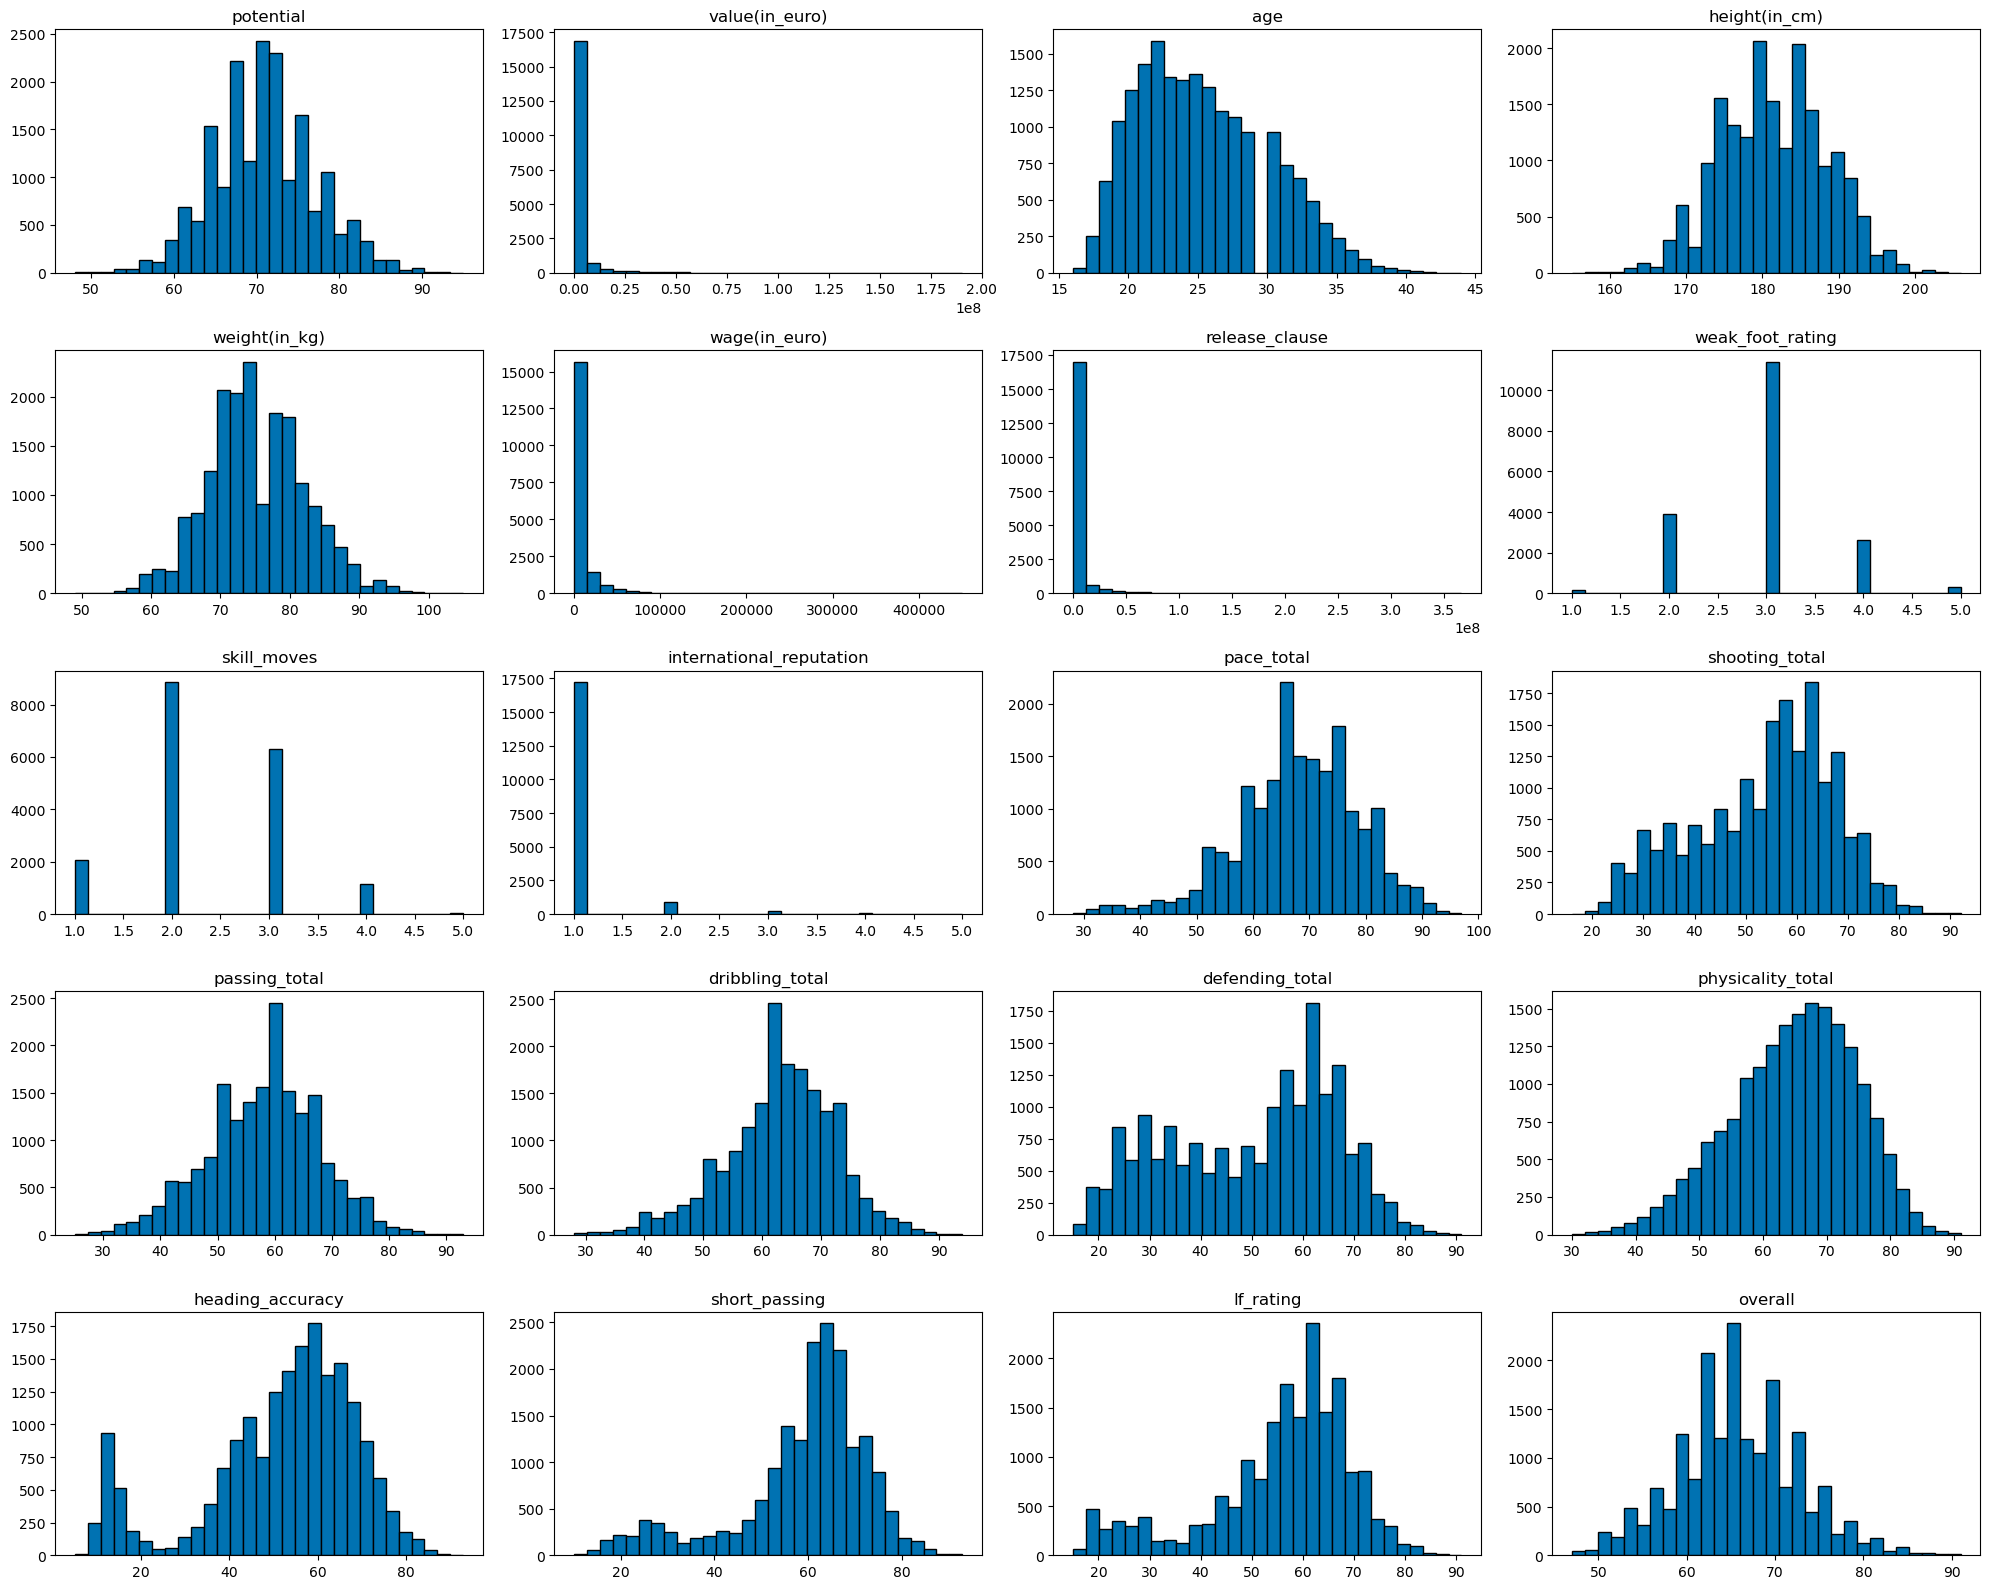

In [28]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### Exercise 2: How do we interpret these histograms?

In [ ]:
# your solution

In [29]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

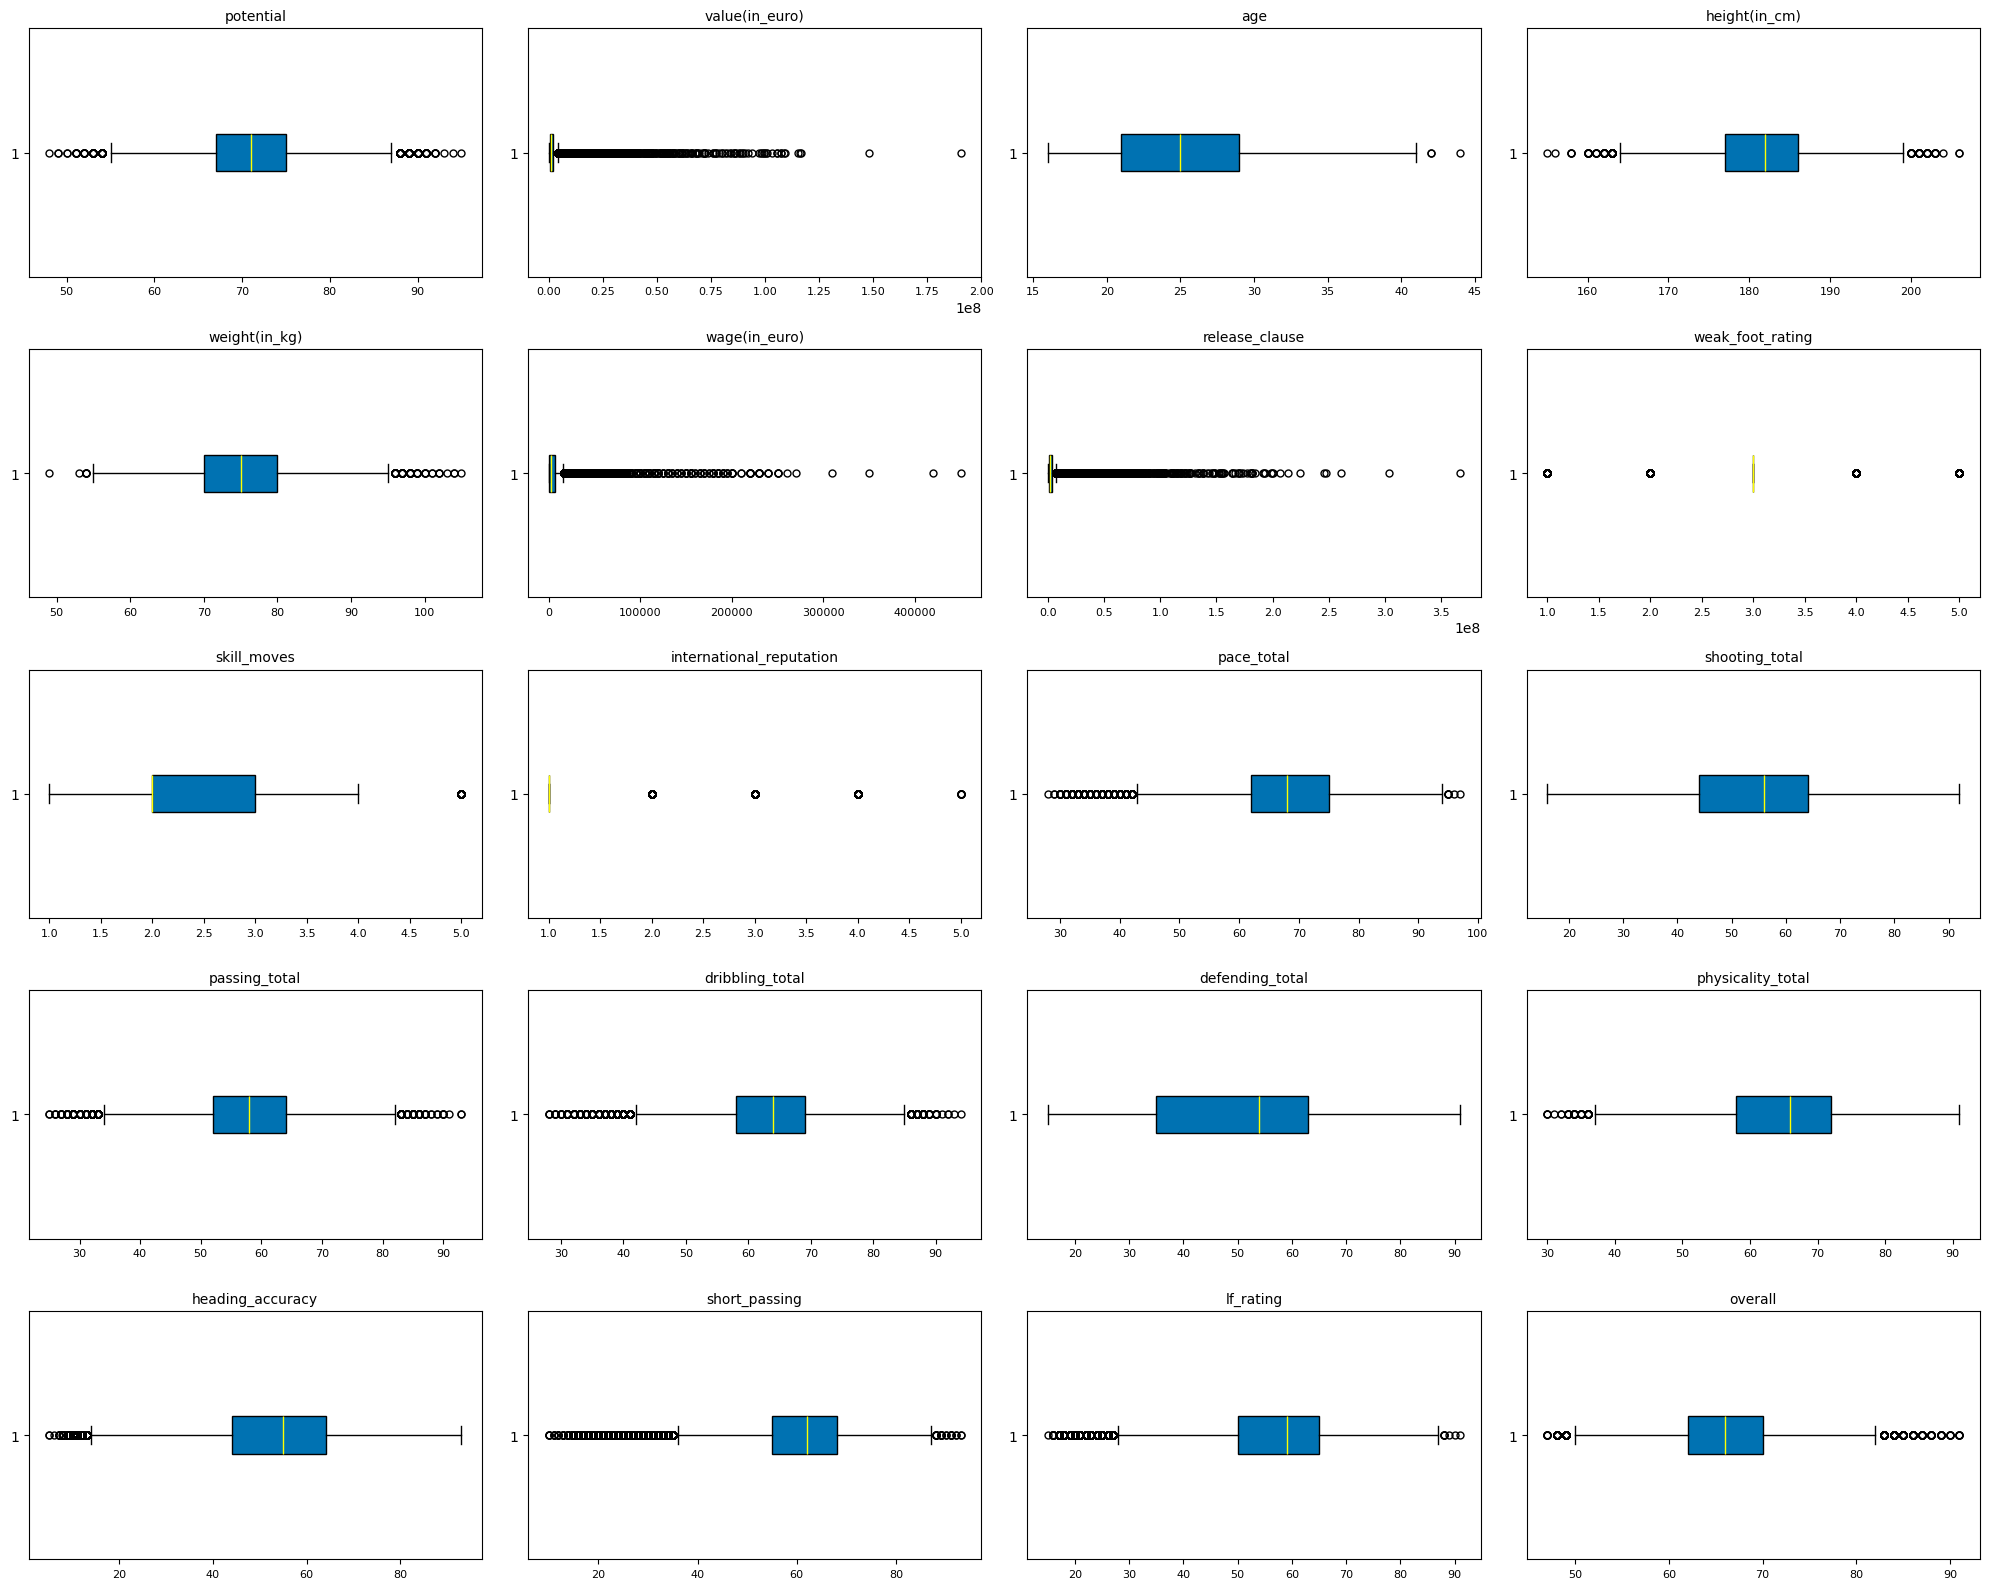

In [30]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

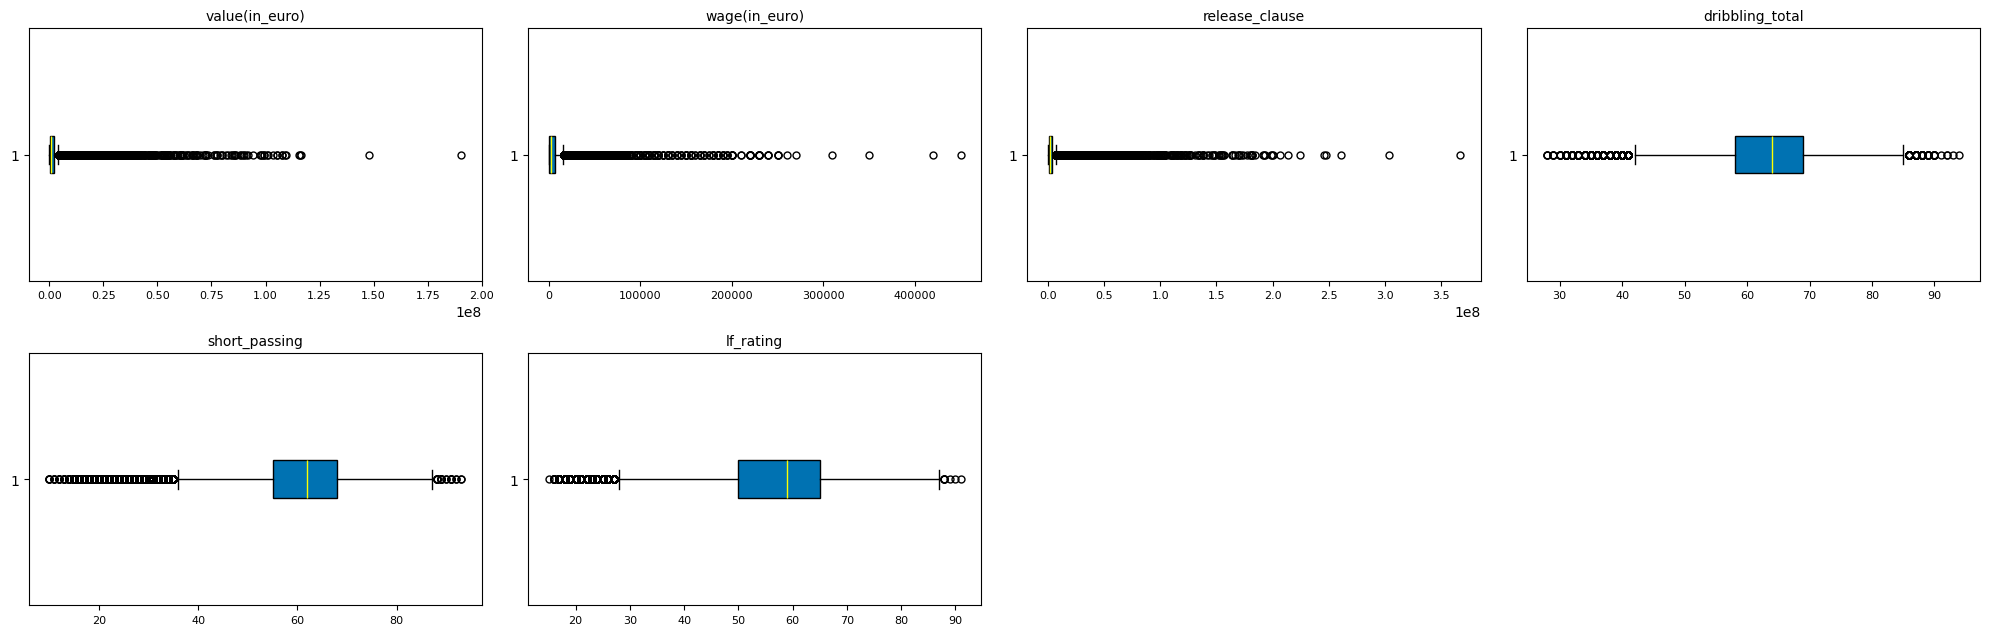

In [31]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

### Exercise 3: What conclusions can you draw from the box plots?

<h2 style="color: #008080;">Looking for Correlations</h2>

In [32]:
num_corr = round(num.corr(), 2)

<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

#### Checking correlations with [Seaborn](https://seaborn.pydata.org/index.html)

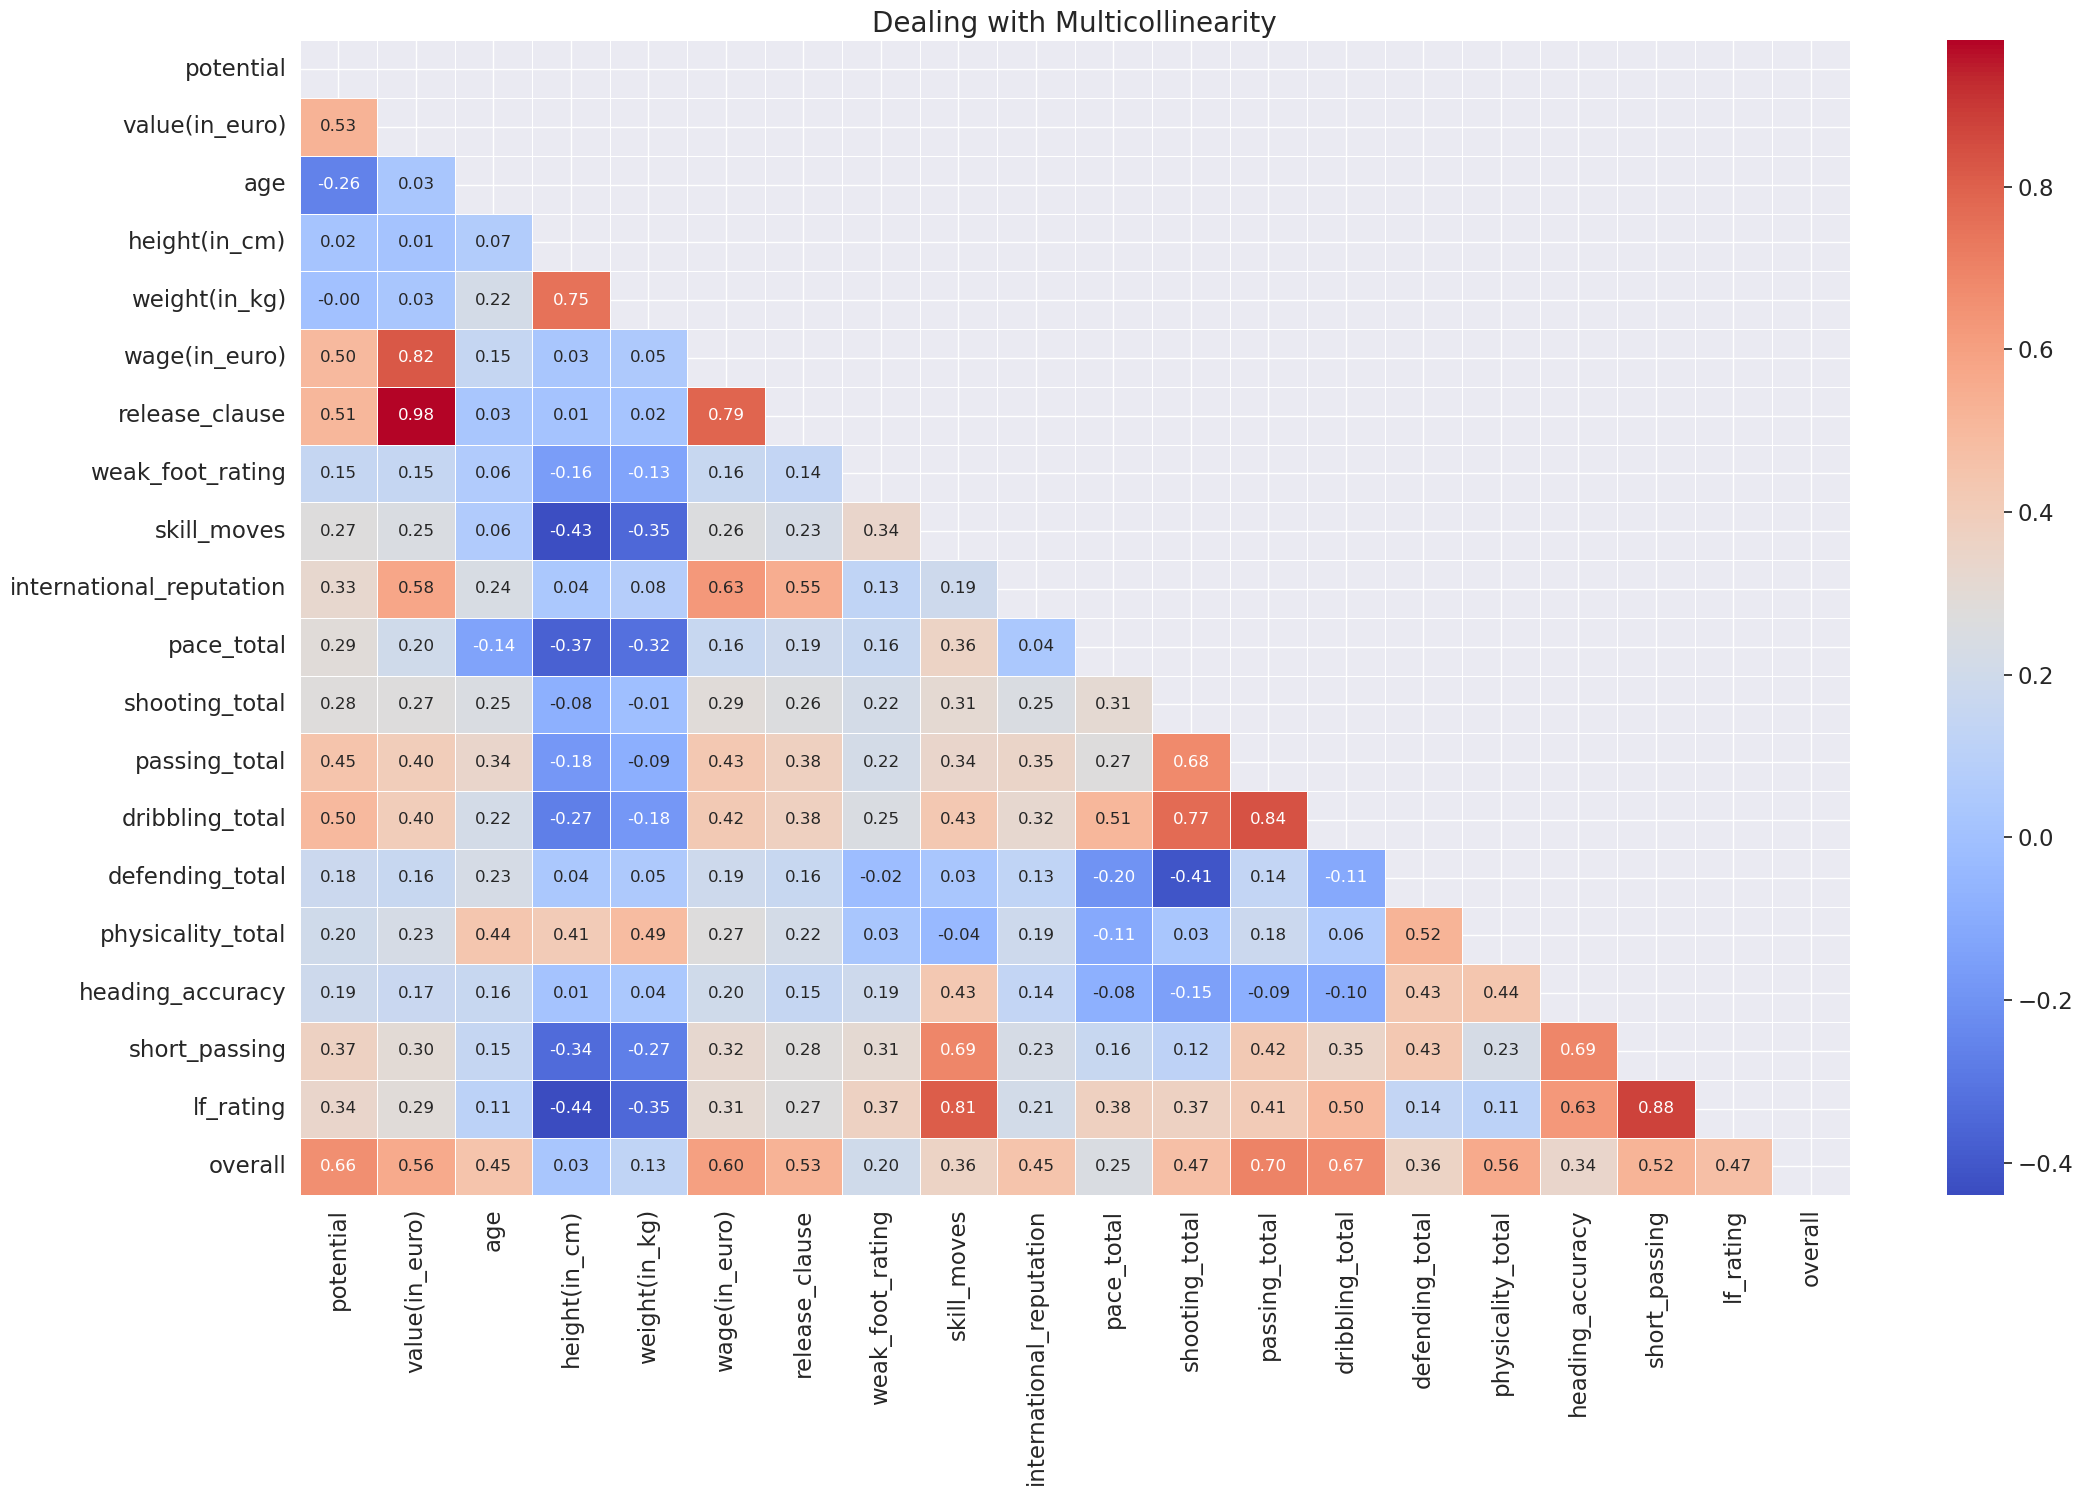

In [35]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [36]:
df.columns

Index(['potential', 'value(in_euro)', 'best_position', 'nationality', 'age',
       'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)', 'release_clause',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating', 'overall'],
      dtype='object')

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

In [ ]:
# your solution

### Specific Correlations with the Target

### Perform 3 Plots and Explain the Findings from the Data

### Contigency Tables, Chi-Square...

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

<h2 style="color: #008080;">Normalizing the Data</h2>

<h1 style="color: #00BFFF;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

<h2 style="color: #008080;">Model Validation</h2>

<h1 style="color: #00BFFF;">06 | Improving the Model</h1>

<h1 style="color: #00BFFF;">07 | Reporting</h1>